Data Link : https://catalog.data.gov/dataset/crash-reporting-drivers-data

### Table of Contents
- [Importing Libraries & Initial Setup](#Importing-Libraries-&-Initial-Setup)
- [Data Set Description](#Data-Set-Description)
- [Data Cleaning](#Data-Cleaning)
- [Data Exploration](#Data-Exploration)
- [Finding 1 : Weather Impact on Crash Incidents](#Finding-1-:-Weather-Impact-on-Crash-Incidents)
- [Finding 2 : Driver Behaviour Significance](#Finding-2-:-Driver-Behaviour-Significance)
- [Finding 3 : Traffic Control Effectiveness](#Finding-3-:-Traffic-Control-Effectiveness)

# Importing Libraries & Initial Setup

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.cluster import KMeans
import plotly.express as px

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv('Crash_Reporting_-_Drivers_Data.csv',index_col=0, low_memory=False)

df_copy = df.copy()

# Data Set Description


<b>This dataset captures detailed road crash information, including crash date, location, road conditions, vehicle details, driver behavior, and environmental factors. It's designed to help analyze crash causes and outcomes.</b>

1. **Report Number**: ACRS Report Number assigned to the incident.
2. **Local Case Number**: Case number from the local investigating agency for the incident.
3. **Agency Name**: Name of the investigating agency.
4. **ACRS Report Type**: Identifies crash as property, injury, or fatal.
5. **Crash Date/Time**: Date and Time of crash.
6. **Route Type**: Type of roadway at crash location.
7. **Road Name**: Name of road.
8. **Cross-Street Name**: Name of nearest cross-street.
9. **Off-Road Description**: Description of location for off-road collisions.
10. **Municipality**: Jurisdiction for crash location.
11. **Related Non-Motorist**: Type(s) of non-motorist involved.
12. **Collision Type**: Type of collision.
13. **Weather**: Weather at collision location.
14. **Surface Condition**: Condition of roadway surface.
15. **Light**: Lighting conditions.
16. **Traffic Control**: Signage or traffic control devices.
17. **Driver Substance Abuse**: Substance abuse detected for all drivers involved.
18. **Non-Motorist Substance Abuse**: Substance abuse detected for all non-motorists involved.
19. **Person ID**: Unique identifier for this non-motorist.
20. **Driver At Fault**: Whether this driver was at fault.
21. **Injury Severity**: Severity of injury to this driver.
22. **Circumstance**: Circumstance(s) specific to this driver.
23. **Driver Distracted By**: The reason the driver was distracted.
24. **Drivers License State**: The state the driver's license was issued.
25. **Vehicle ID**: The unique identifier for the driver's vehicle.
26. **Vehicle Damage Extent**: The severity of the vehicle damage.
27. **Vehicle First Impact Location**: Location on vehicle where first impact occurred.
28. **Vehicle Body Type**: The body type of the vehicle.
29. **Vehicle Movement**: The movement of the vehicle at the time of the collision.
30. **Vehicle Going Dir**: Movement of vehicle before collision.
31. **Speed Limit**: Local area posted speed limit.
32. **Driverless Vehicle**: Indicates if the vehicle was driverless or not.
33. **Parked Vehicle**: Indicates if the vehicle was parked or not at the event.
34. **Vehicle Year**: The vehicle's year.
35. **Vehicle Make**: Make of the vehicle.
36. **Vehicle Model**: Model of the vehicle.
37. **Latitude**: Y coordinate of crash location.
38. **Longitude**: X coordinate of crash location.
39. **Location**: coordinates of crash location.


# Data Cleaning

Converting the Crash Date/Time column to a datetime object, coercing invalid entries to NaT.

In [2]:
# Convert the Crash Date/Time column to 24-hour format
df_copy['Crash Date/Time'] = pd.to_datetime(df_copy['Crash Date/Time'], format='%m/%d/%Y %I:%M:%S %p', errors='coerce')

In [3]:
df_copy.isna().sum() 

Local Case Number                     0
Agency Name                           0
ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        18394
Road Name                         19349
Cross-Street Name                 25957
Off-Road Description             170734
Municipality                     168964
Related Non-Motorist             182050
Collision Type                      585
Weather                           13356
Surface Condition                 21604
Light                              1445
Traffic Control                   26847
Driver Substance Abuse            31320
Non-Motorist Substance Abuse     183196
Person ID                             0
Driver At Fault                       0
Injury Severity                     990
Circumstance                     152482
Driver Distracted By               1072
Drivers License State             11770
Vehicle ID                            0
Vehicle Damage Extent               316


In [4]:
# Calculates the percentage of missing values for each column in the DataFrame.
missing_percentage = df_copy.isna().mean()

# Identifying columns with more than 80% missing values.
columns_to_drop = missing_percentage[missing_percentage > 0.8].index

# Dropping the identified columns from the DataFrame.
df_copy = df_copy.drop(columns=columns_to_drop)

# Displaying the names of the remaining columns in the DataFrame.
df_copy.columns

Index(['Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name',
       'Collision Type', 'Weather', 'Surface Condition', 'Light',
       'Traffic Control', 'Driver Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Driver Distracted By',
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [5]:
df_copy.isna().sum()

Local Case Number                    0
Agency Name                          0
ACRS Report Type                     0
Crash Date/Time                      0
Route Type                       18394
Road Name                        19349
Cross-Street Name                25957
Collision Type                     585
Weather                          13356
Surface Condition                21604
Light                             1445
Traffic Control                  26847
Driver Substance Abuse           31320
Person ID                            0
Driver At Fault                      0
Injury Severity                    990
Driver Distracted By              1072
Drivers License State            11770
Vehicle ID                           0
Vehicle Damage Extent              316
Vehicle First Impact Location      156
Vehicle Body Type                 2813
Vehicle Movement                   911
Vehicle Going Dir                 5298
Speed Limit                          0
Driverless Vehicle       

Converted strings to uppercase to keep things consistent and make it easier to compare or analyze the data without worrying about capitalization.

In [6]:
# Selecting all columns with string
string_columns = df_copy.select_dtypes(include='object').columns
# Converting all string values in the selected columns to uppercase.
df_copy[string_columns] = df_copy[string_columns].apply(lambda col: col.str.upper())

Filled missing data with 'UNKNOWN' and replaced 'OTHER' with 'UNKNOWN' to keep things consistent.

In [7]:
# Filling all missing values in the DataFrame with 'UNKNOWN'.
df_copy.fillna('UNKNOWN', inplace=True)

# Replacing all occurrences of the value 'OTHER' with 'UNKNOWN' in the DataFrame.
df_copy.replace('OTHER','UNKNOWN',inplace=True)

df_copy.isna().sum()

Local Case Number                0
Agency Name                      0
ACRS Report Type                 0
Crash Date/Time                  0
Route Type                       0
Road Name                        0
Cross-Street Name                0
Collision Type                   0
Weather                          0
Surface Condition                0
Light                            0
Traffic Control                  0
Driver Substance Abuse           0
Person ID                        0
Driver At Fault                  0
Injury Severity                  0
Driver Distracted By             0
Drivers License State            0
Vehicle ID                       0
Vehicle Damage Extent            0
Vehicle First Impact Location    0
Vehicle Body Type                0
Vehicle Movement                 0
Vehicle Going Dir                0
Speed Limit                      0
Driverless Vehicle               0
Parked Vehicle                   0
Vehicle Year                     0
Vehicle Make        

In [8]:
#column wise cleaning for unique values
df_copy['Surface Condition'].unique()

array(['UNKNOWN', 'DRY', 'ICE', 'WET', 'SLUSH', 'WATER(STANDING/MOVING)',
       'SNOW', 'MUD, DIRT, GRAVEL', 'OIL', 'SAND',
       'WATER (STANDING, MOVING)', 'ICE/FROST'], dtype=object)

In [9]:
# Replacing occurrences of 'ICE/FROST' with 'ICE
df_copy['Surface Condition'] = df_copy['Surface Condition'].replace('ICE/FROST', 'ICE')

df_copy['Surface Condition'].unique()

array(['UNKNOWN', 'DRY', 'ICE', 'WET', 'SLUSH', 'WATER(STANDING/MOVING)',
       'SNOW', 'MUD, DIRT, GRAVEL', 'OIL', 'SAND',
       'WATER (STANDING, MOVING)'], dtype=object)

In [10]:
# Replacing 'WATER (STANDING, MOVING)' with 'WET' in the 'Surface Condition' column
df_copy['Surface Condition'] = df_copy['Surface Condition'].replace('WATER (STANDING, MOVING)', 'WET')

# Replacing 'WATER(STANDING/MOVING)' with 'WET' in the 'Surface Condition' column 
df_copy['Surface Condition'] = df_copy['Surface Condition'].replace('WATER(STANDING/MOVING)', 'WET')

df_copy['Surface Condition'].unique()

array(['UNKNOWN', 'DRY', 'ICE', 'WET', 'SLUSH', 'SNOW',
       'MUD, DIRT, GRAVEL', 'OIL', 'SAND'], dtype=object)

In [11]:
df_copy['Surface Condition'].value_counts()

Surface Condition
DRY                  132617
WET                   30702
UNKNOWN               22305
ICE                    1125
SNOW                   1026
SLUSH                   230
MUD, DIRT, GRAVEL        49
OIL                      28
SAND                      8
Name: count, dtype: int64

In [12]:
df_copy['Light'].unique()

array(['DAYLIGHT', 'DARK LIGHTS ON', 'DUSK', 'DAWN', 'DARK NO LIGHTS',
       'UNKNOWN', 'DARK -- UNKNOWN LIGHTING', 'DARK - LIGHTED',
       'DARK - NOT LIGHTED', 'DARK - UNKNOWN LIGHTING'], dtype=object)

In [13]:
# Replaceing 'DARK -- UNKNOWN LIGHTING' with 'DARK - UNKNOWN LIGHTING' in the 'Light' column to standardize formatting.
df_copy['Light'] = df_copy['Light'].replace('DARK -- UNKNOWN LIGHTING', 'DARK - UNKNOWN LIGHTING')

In [14]:
df_copy['Light'].value_counts()

Light
DAYLIGHT                   127531
DARK LIGHTS ON              39553
DARK NO LIGHTS               4967
DUSK                         4142
DAWN                         3648
DARK - LIGHTED               3427
UNKNOWN                      2583
DARK - UNKNOWN LIGHTING      1680
DARK - NOT LIGHTED            559
Name: count, dtype: int64

In [15]:
df_copy['Traffic Control'].unique()

array(['NO CONTROLS', 'UNKNOWN', 'STOP SIGN', 'TRAFFIC SIGNAL', 'PERSON',
       'FLASHING TRAFFIC SIGNAL', 'YIELD SIGN', 'WARNING SIGN',
       'SCHOOL ZONE SIGN DEVICE', 'RAILWAY CROSSING DEVICE',
       'TRAFFIC CONTROL SIGNAL', 'FLASHING TRAFFIC CONTROL SIGNAL',
       'OTHER WARNING SIGN', 'PEDESTRIAN CROSSING',
       'PERSON (INCLUDING FLAGGER, LAW ENFORCEMENT, CROSSING GUARD, ETC.',
       'OTHER SIGNAL', 'LANE USE CONTROL SIGNAL',
       'OTHER PAVEMENT MARKING (EXCLUDING EDGELINES, CENTERLINES, OR LANE LINES)',
       'PEDESTRIAN CROSSING SIGN', 'SCHOOL ZONE SIGN',
       'CURVE AHEAD WARNING SIGN', 'INTERSECTION AHEAD WARNING SIGN',
       'RAMP METER SIGNAL', 'REDUCE SPEED AHEAD WARNING SIGN',
       'FLASHING RAILROAD CROSSING SIGNAL (MAY INCLUDE GATES)',
       'BICYCLE CROSSING SIGN', 'SCHOOL ZONE'], dtype=object)

In [16]:
df_copy['Traffic Control'].value_counts()

Traffic Control
NO CONTROLS                                                                 76210
TRAFFIC SIGNAL                                                              58898
UNKNOWN                                                                     29196
STOP SIGN                                                                   13394
TRAFFIC CONTROL SIGNAL                                                       5143
FLASHING TRAFFIC SIGNAL                                                      2132
YIELD SIGN                                                                   1872
FLASHING TRAFFIC CONTROL SIGNAL                                               313
PERSON                                                                        282
WARNING SIGN                                                                  154
LANE USE CONTROL SIGNAL                                                       128
PEDESTRIAN CROSSING SIGN                                                      102


In [17]:
df_copy['Driver Substance Abuse'].unique()

array(['NONE DETECTED', 'UNKNOWN', 'ALCOHOL CONTRIBUTED',
       'ALCOHOL PRESENT', 'COMBINATION CONTRIBUTED',
       'COMBINED SUBSTANCE PRESENT', 'ILLEGAL DRUG CONTRIBUTED',
       'ILLEGAL DRUG PRESENT', 'MEDICATION CONTRIBUTED',
       'MEDICATION PRESENT', 'UNKNOWN, UNKNOWN',
       'NOT SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE',
       'SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE',
       'SUSPECT OF ALCOHOL USE, UNKNOWN',
       'NOT SUSPECT OF ALCOHOL USE, SUSPECT OF DRUG USE',
       'UNKNOWN, NOT SUSPECT OF DRUG USE',
       'SUSPECT OF ALCOHOL USE, SUSPECT OF DRUG USE',
       'NOT SUSPECT OF ALCOHOL USE, UNKNOWN',
       'UNKNOWN, SUSPECT OF DRUG USE'], dtype=object)

In [18]:
df_copy['Driver Substance Abuse'].value_counts()

Driver Substance Abuse
NONE DETECTED                                          122547
UNKNOWN                                                 43369
NOT SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE     13742
ALCOHOL PRESENT                                          4087
UNKNOWN, UNKNOWN                                         1660
ALCOHOL CONTRIBUTED                                      1435
SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE           407
ILLEGAL DRUG PRESENT                                      259
MEDICATION PRESENT                                        117
ILLEGAL DRUG CONTRIBUTED                                  102
COMBINED SUBSTANCE PRESENT                                 92
MEDICATION CONTRIBUTED                                     64
SUSPECT OF ALCOHOL USE, UNKNOWN                            52
COMBINATION CONTRIBUTED                                    47
UNKNOWN, NOT SUSPECT OF DRUG USE                           32
SUSPECT OF ALCOHOL USE, SUSPECT OF DRUG USE    

In [19]:
# Cleaning up and simplifying the Driver Substance Abuse data by grouping similar terms together, making it easier to analyze. 
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace('UNKNOWN, UNKNOWN', 'UNKNOWN')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace('UNKNOWN, NOT SUSPECT OF DRUG USE', 'UNKNOWN')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace('NOT SUSPECT OF ALCOHOL USE, UNKNOWN', 'UNKNOWN')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace('NOT SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE', 'NONE DETECTED')
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace({'ALCOHOL CONTRIBUTED':'ALCOHOL PRESENT',
                                                                              'SUSPECT OF ALCOHOL USE, NOT SUSPECT OF DRUG USE':'ALCOHOL PRESENT',
                                                                              'SUSPECT OF ALCOHOL USE, UNKNOWN' : 'ALCOHOL PRESENT'})
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace({
                                                                              'ILLEGAL DRUG CONTRIBUTED':'ILLEGAL DRUG PRESENT',
                                                                              'NOT SUSPECT OF ALCOHOL USE, SUSPECT OF DRUG USE' :'ILLEGAL DRUG PRESENT',
                                                                              'UNKNOWN, SUSPECT OF DRUG USE' : 'ILLEGAL DRUG PRESENT'
                                                                              })  

df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace({
                                                                              'COMBINATION CONTRIBUTED':'COMBINED SUBSTANCE PRESENT',
                                                                              'SUSPECT OF ALCOHOL USE, SUSPECT OF DRUG USE' :'COMBINED SUBSTANCE PRESENT'
                                                                              })  
df_copy['Driver Substance Abuse'] = df_copy['Driver Substance Abuse'].replace({
                                                                              'MEDICATION CONTRIBUTED':'MEDICATION PRESENT'
                                                                              })  


df_copy['Driver Substance Abuse'].value_counts()

Driver Substance Abuse
NONE DETECTED                 136289
UNKNOWN                        45089
ALCOHOL PRESENT                 5981
ILLEGAL DRUG PRESENT             383
MEDICATION PRESENT               181
COMBINED SUBSTANCE PRESENT       167
Name: count, dtype: int64

In [20]:
df_copy['Injury Severity'].unique()

array(['NO APPARENT INJURY', 'SUSPECTED MINOR INJURY', 'POSSIBLE INJURY',
       'SUSPECTED SERIOUS INJURY', 'FATAL INJURY', 'UNKNOWN'],
      dtype=object)

In [21]:
df_copy['Vehicle Damage Extent'].unique()

array(['SUPERFICIAL', 'UNKNOWN', 'NO DAMAGE', 'DISABLING', 'FUNCTIONAL',
       'DESTROYED', 'VEHICLE NOT AT SCENE'], dtype=object)

In [22]:
#Simplifying direction labels by removing "BOUND" 
df_copy['Vehicle Going Dir'] = df_copy['Vehicle Going Dir'].replace('SOUTHBOUND', 'SOUTH')
df_copy['Vehicle Going Dir'] = df_copy['Vehicle Going Dir'].replace('NORTHBOUND', 'NORTH')
df_copy['Vehicle Going Dir'] = df_copy['Vehicle Going Dir'].replace('WESTBOUND', 'WEST')
df_copy['Vehicle Going Dir'] = df_copy['Vehicle Going Dir'].replace('EASTBOUND', 'EAST')

In [23]:
df_copy['Vehicle Year'].isna().sum()

0

In [24]:
# Replacing 'UNKN' with 'UNKNOWN' in the 'Vehicle Make' column
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('UNKN', 'UNKNOWN')
df_copy['Vehicle Make'].nunique()

1933

In [25]:
df_copy['Vehicle Make'].value_counts().head(20)

Vehicle Make
TOYOTA       26196
HONDA        21184
FORD         18627
NISSAN        9468
TOYT          8841
HOND          5765
DODGE         4827
CHEVROLET     4658
HYUNDAI       4595
UNKNOWN       4192
JEEP          4151
CHEV          3670
BMW           3659
CHEVY         3212
LEXUS         3211
ACURA         3187
KIA           3027
NISS          2651
SUBARU        2610
MAZDA         2460
Name: count, dtype: int64

In [26]:
#standarding vehicle makes by replacing short forms with full names
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('TOYT', 'TOYOTA')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('HOND', 'HONDA')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace({'CHEV': 'CHEVROLET', 'CHEVY':'CHEVROLET'})
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('NISS', 'NISSAN')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('HYUN', 'HYUNDAI')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('MERZ', 'MERCEDES')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('ACUR', 'ACURA')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('SUBA', 'SUBARU')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('MAZD', 'MAZDA')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace({'VOLK':'VOLKSWAGON','VOLKS':'VOLKSWAGON'})
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('THOM', 'THOMAS')
df_copy['Vehicle Make'] = df_copy['Vehicle Make'].replace('VOLV', 'VOLVO')
df_copy['Vehicle Make'].value_counts().head(20)

Vehicle Make
TOYOTA        35037
HONDA         26949
FORD          18627
NISSAN        12119
CHEVROLET     11540
HYUNDAI        6658
DODGE          4827
UNKNOWN        4192
JEEP           4151
ACURA          4149
BMW            3659
SUBARU         3554
LEXUS          3211
MAZDA          3174
MERCEDES       3077
KIA            3027
VOLKSWAGON     2224
THOMAS         2143
GMC            2008
AUDI           1518
Name: count, dtype: int64

In [27]:
df_copy['Vehicle Model'].nunique()

6991

In [28]:
df_copy.groupby('Vehicle Model')['Vehicle Model'].size().nlargest(10)

Vehicle Model
4S         13753
TK         10979
CAMRY       6851
CIVIC       6218
COROLLA     6172
ACCORD      6145
UNKNOWN     4928
BUS         3922
RAV4        3042
ALTIMA      2765
Name: Vehicle Model, dtype: int64

#### Final Data After Cleaning

In [29]:
df_copy.isna().any()

Local Case Number                False
Agency Name                      False
ACRS Report Type                 False
Crash Date/Time                  False
Route Type                       False
Road Name                        False
Cross-Street Name                False
Collision Type                   False
Weather                          False
Surface Condition                False
Light                            False
Traffic Control                  False
Driver Substance Abuse           False
Person ID                        False
Driver At Fault                  False
Injury Severity                  False
Driver Distracted By             False
Drivers License State            False
Vehicle ID                       False
Vehicle Damage Extent            False
Vehicle First Impact Location    False
Vehicle Body Type                False
Vehicle Movement                 False
Vehicle Going Dir                False
Speed Limit                      False
Driverless Vehicle       

# Data Exploration

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Crash Year'>

Text(0.5, 1.0, 'Total Crashes by Year')

Text(0.5, 0, 'Year')

Text(0, 0.5, 'Number of Crashes')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '2015'),
  Text(1, 0, '2016'),
  Text(2, 0, '2017'),
  Text(3, 0, '2018'),
  Text(4, 0, '2019'),
  Text(5, 0, '2020'),
  Text(6, 0, '2021'),
  Text(7, 0, '2022'),
  Text(8, 0, '2023'),
  Text(9, 0, '2024')])

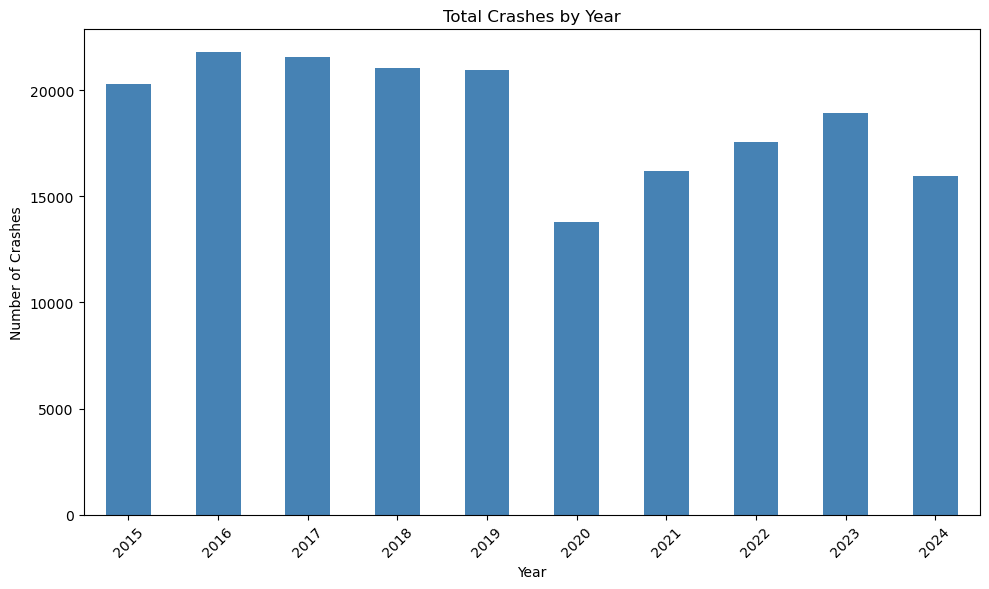

In [30]:
# Convertig 'Crash Date/Time' to datetime format
df_copy['Crash Date/Time'] = pd.to_datetime(df_copy['Crash Date/Time'], errors='coerce')

# Extracting the year from the crash date
df_copy['Crash Year'] = df_copy['Crash Date/Time'].dt.year

# Grouping by year to calculate total crashes
crashes_by_year = df_copy['Crash Year'].value_counts().sort_index()
# Plot for total crashes by year
plt.figure(figsize=(10, 6))
crashes_by_year.plot(kind='bar', color='steelblue')
plt.title('Total Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Crash Month'>

Text(0.5, 1.0, 'Total Crashes by Month')

Text(0.5, 0, 'Month')

Text(0, 0.5, 'Number of Crashes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10'),
  Text(10, 0, '11'),
  Text(11, 0, '12')])

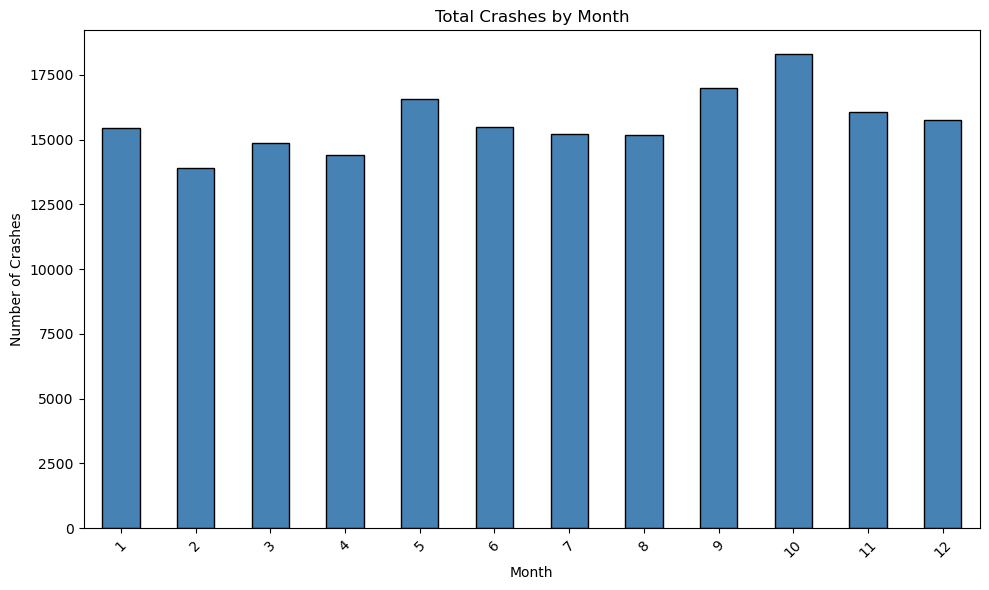

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Crash Day of Week'>

Text(0.5, 1.0, 'Total Crashes by Day of the Week')

Text(0.5, 0, 'Day of the Week')

Text(0, 0.5, 'Number of Crashes')

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Monday'),
  Text(1, 0, 'Tuesday'),
  Text(2, 0, 'Wednesday'),
  Text(3, 0, 'Thursday'),
  Text(4, 0, 'Friday'),
  Text(5, 0, 'Saturday'),
  Text(6, 0, 'Sunday')])

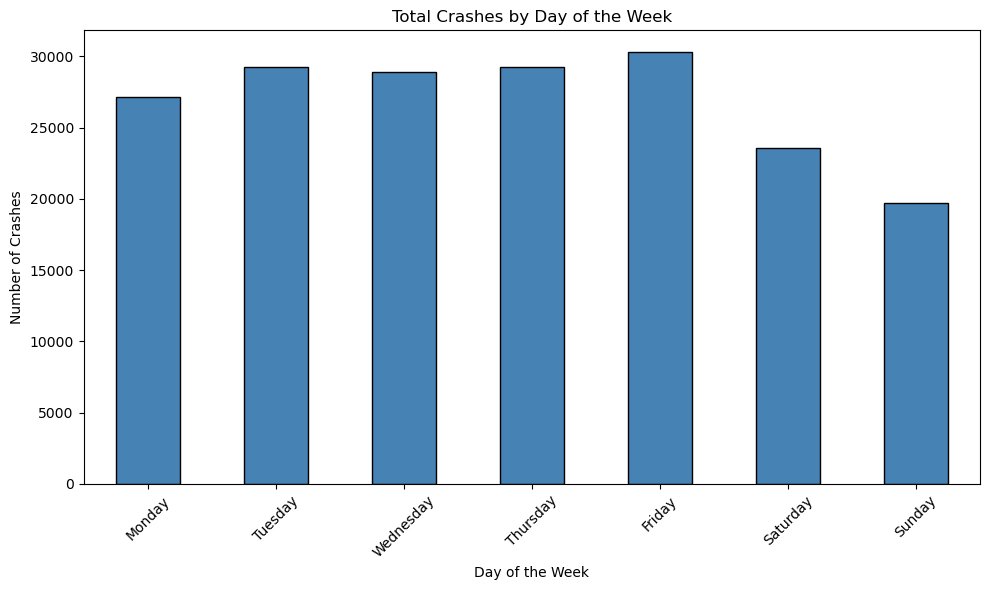

<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='Crash Hour'>

Text(0.5, 1.0, 'Total Crashes by Hour')

Text(0.5, 0, 'Hour of the Day')

Text(0, 0.5, 'Number of Crashes')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

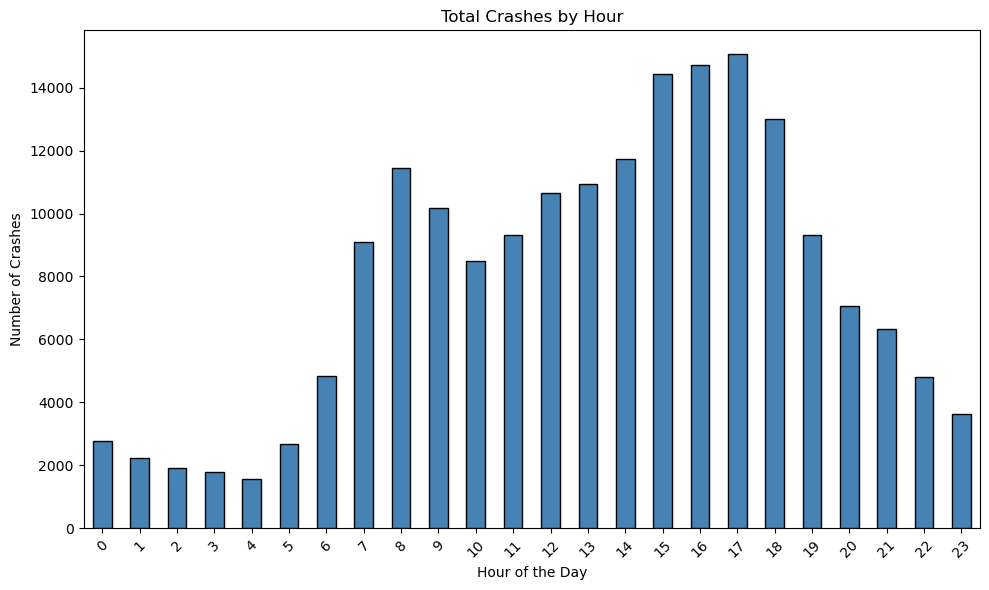

In [31]:
# Extracting month, day, and hour from the crash date
df_copy['Crash Month'] = df_copy['Crash Date/Time'].dt.month
df_copy['Crash Day'] = df_copy['Crash Date/Time'].dt.day
df_copy['Crash Hour'] = df_copy['Crash Date/Time'].dt.hour

# Grouping by month to calculate total crashes
crashes_by_month = df_copy['Crash Month'].value_counts().sort_index()

# Plot for total crashes by month
plt.figure(figsize=(10, 6))
crashes_by_month.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouping by day to calculate total crashes
df_copy['Crash Day of Week'] = df_copy['Crash Date/Time'].dt.day_name()

# Grouping by day of the week to calculate total crashes
crashes_by_day_of_week = df_copy['Crash Day of Week'].value_counts().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

# Plot for total crashes by day of the week
plt.figure(figsize=(10, 6))
crashes_by_day_of_week.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Crashes by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Grouping by hour to calculate total crashes
crashes_by_hour = df_copy['Crash Hour'].value_counts().sort_index()

# Plot for total crashes by hour
plt.figure(figsize=(10, 6))
crashes_by_hour.plot(kind='bar', color='steelblue', edgecolor='black')
plt.title('Total Crashes by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<Figure size 1200x600 with 0 Axes>

<BarContainer object of 9 artists>

<BarContainer object of 6 artists>

Text(0.5, 1.0, 'Top 10 Vehicle Movements by Driver Fault Status')

Text(0.5, 0, 'Vehicle Movement Type')

Text(0, 0.5, 'Crash Count')

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'MOVING CONSTANT SPEED'),
  Text(1, 0, 'MAKING LEFT TURN'),
  Text(2, 0, 'SLOWING OR STOPPING'),
  Text(3, 0, 'ACCELERATING'),
  Text(4, 0, 'BACKING'),
  Text(5, 0, 'CHANGING LANES'),
  Text(6, 0, 'MAKING RIGHT TURN'),
  Text(7, 0, 'UNKNOWN'),
  Text(8, 0, 'STARTING FROM LANE'),
  Text(9, 0, 'STOPPED IN TRAFFIC LANE'),
  Text(10, 0, 'PARKED')])

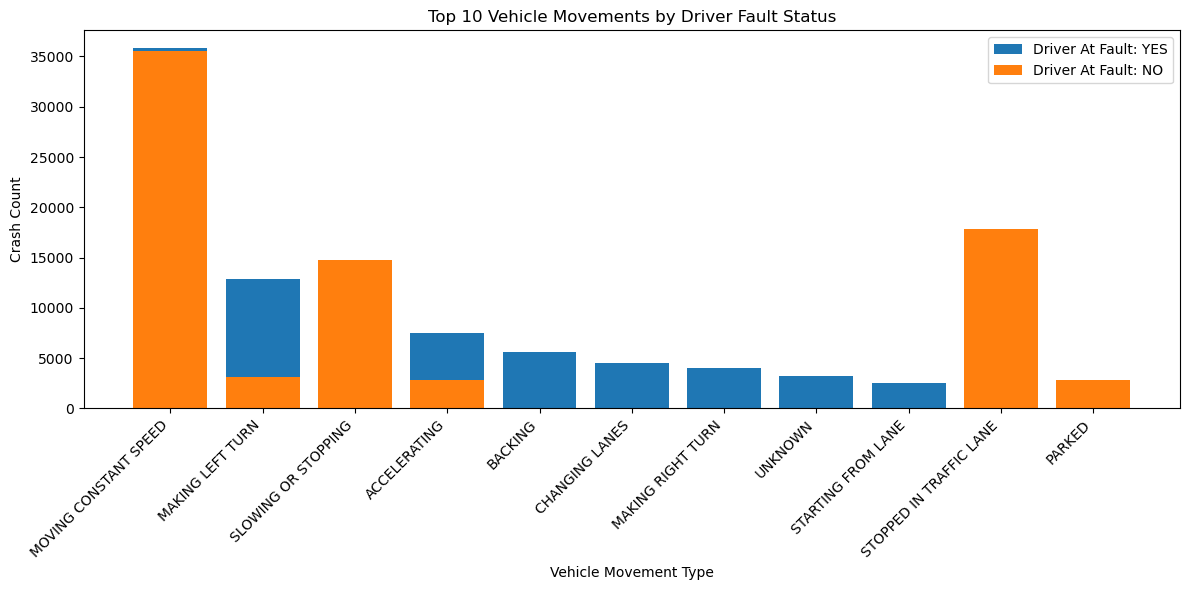

In [32]:
# Grouping by Vehicle Movement Type and Driver At Fault
movement_fault_analysis = df_copy.groupby(['Vehicle Movement', 'Driver At Fault']).size().reset_index(name='Crash Count')

# Filtering for meaningful insights: Showing the top 10 movements with the highest crash counts
top_movements = movement_fault_analysis.sort_values(by='Crash Count', ascending=False).head(15)

# Plot for the top movements as a bar chart
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for fault_status in top_movements['Driver At Fault'].unique():
    subset = top_movements[top_movements['Driver At Fault'] == fault_status]
    plt.bar(subset['Vehicle Movement'], subset['Crash Count'], label=f'Driver At Fault: {fault_status}')

plt.title('Top 10 Vehicle Movements by Driver Fault Status')
plt.xlabel('Vehicle Movement Type')
plt.ylabel('Crash Count')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


<Axes: xlabel='Speed Zone'>

Text(0.5, 1.0, 'Crash Frequency by Speed Zone')

Text(0.5, 0, 'Speed Zone')

Text(0, 0.5, 'Number of Crashes')

(array([0, 1, 2]),
 [Text(0, 0, 'Medium Speed (31-60 mph)'),
  Text(1, 0, 'Low Speed (0-30 mph)'),
  Text(2, 0, 'High Speed (61+ mph)')])

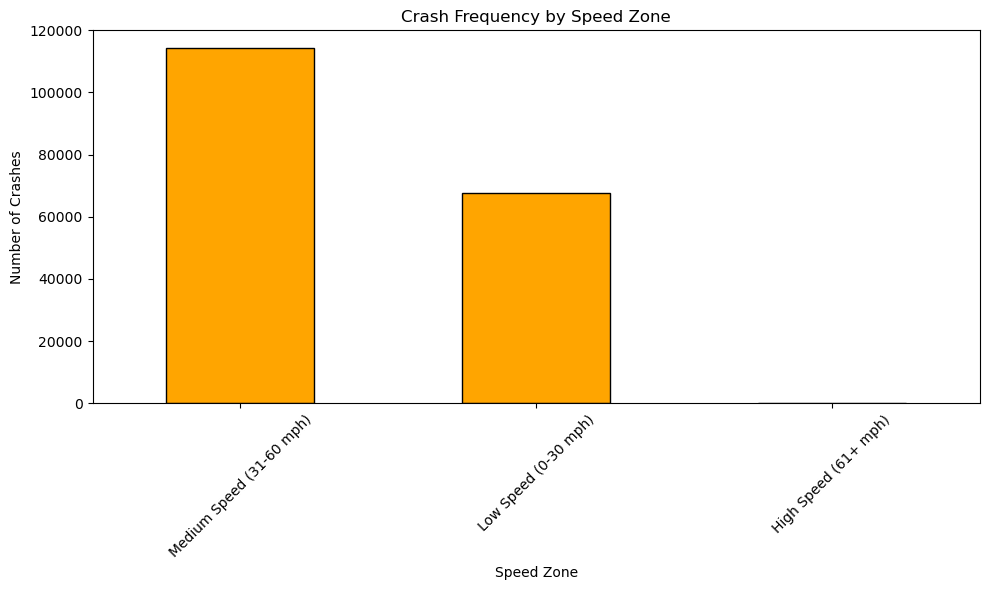

In [33]:
#creating bins for speed limit
bins = [0, 30, 60, 100]
labels = ['Low Speed (0-30 mph)', 'Medium Speed (31-60 mph)', 'High Speed (61+ mph)']
df_copy['Speed Zone'] = pd.cut(df_copy['Speed Limit'], bins=bins, labels=labels)

# Grouping by Speed Zone
speed_zone_analysis = df_copy['Speed Zone'].value_counts()

# Plot crash frequency by speed zone
speed_zone_analysis.plot(kind='bar', figsize=(10, 6), color='orange', edgecolor='black')
plt.title('Crash Frequency by Speed Zone')
plt.xlabel('Speed Zone')
plt.ylabel('Number of Crashes')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [34]:
#identifying hotspots by grouping by 'Latitude', 'Longitude'
hotspots = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='Crash Count')

# Filtering the top hotspots
top_hotspots = hotspots.nlargest(20, 'Crash Count')

top_hotspots

pd.set_option('display.max_columns',None)




Latitude  Longitude  Crash Count
188     38.953000 -77.338000           45
69685   39.113428 -77.236482           29
35402   39.045425 -76.990737           26
35818   39.046277 -76.990695           24
54775   39.079976 -77.138263           20
68500   39.110610 -76.989798           19
39891   39.053502 -77.089490           18
68181   39.109775 -76.910440           18
52911   39.076766 -77.117143           15
56388   39.082770 -76.948513           14
105059  39.720000 -79.486000           14
811     38.963388 -77.086740           12
50279   39.072211 -77.132950           12
61228   39.092455 -77.045757           12
36236   39.046961 -77.052312           11
49007   39.068539 -77.061742           11
24543   39.022362 -76.977708           10
25237   39.023430 -76.986760           10
38236   39.051046 -77.115184           10
47643   39.065790 -77.159873           10

In [35]:

# Displaying the crash hotspots with enhanced visualization on map 
fig = px.scatter_mapbox(
    top_hotspots,
    lat="Latitude",
    lon="Longitude",
    size="Crash Count",
    color="Crash Count", 
    color_continuous_scale="Bluered",   
    title="Top Crash Hotspots with Cluster Representation",
    mapbox_style="open-street-map", 
    hover_name="Crash Count",  
    zoom=8
)



fig.show()


# Findings

## Finding 1 : Weather Impact on Crash Incidents

<h4>Crashes peaked under conditions often deemed safest—clear weather, dry surfaces, and daylight—highlighting that optimal environments alone cannot prevent accidents.</h4>

Clustering to identify pattern in crashes 

<Figure size 800x400 with 0 Axes>

<Axes: xlabel='Longitude', ylabel='Latitude'>

Text(0.5, 1.0, 'Crash Clusters Based on Features (Including Surface Condition and Light)')

Text(0.5, 0, 'Longitude')

Text(0, 0.5, 'Latitude')

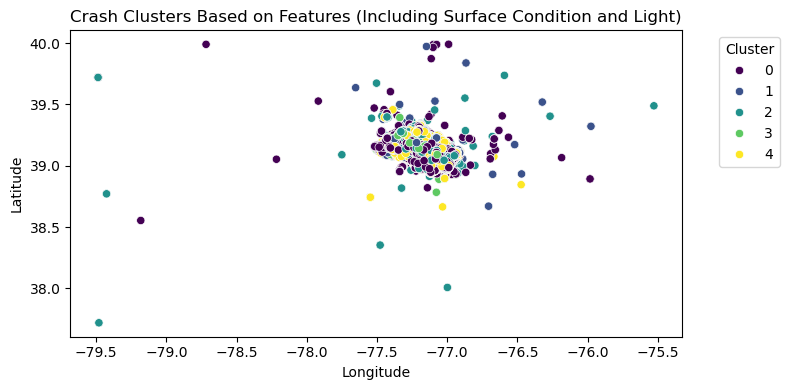

In [36]:
clustering_data = df_copy[['Latitude', 'Longitude', 'Injury Severity', 'Weather', 'Surface Condition', 'Light']]

clustering_data = pd.get_dummies(clustering_data, drop_first=True)

# Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
df_copy['Cluster'] = kmeans.fit_predict(clustering_data)

# Visualize clusters on a map (if location data exists)
plt.figure(figsize=(8, 4))
sns.scatterplot(data=df_copy, x='Longitude', y='Latitude', hue='Cluster', palette='viridis')
plt.title('Crash Clusters Based on Features (Including Surface Condition and Light)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Crashes by Light Across Clusters')

Text(0.5, 0, 'Crash Clusters')

Text(0, 0.5, 'Number of Crashes by Light')

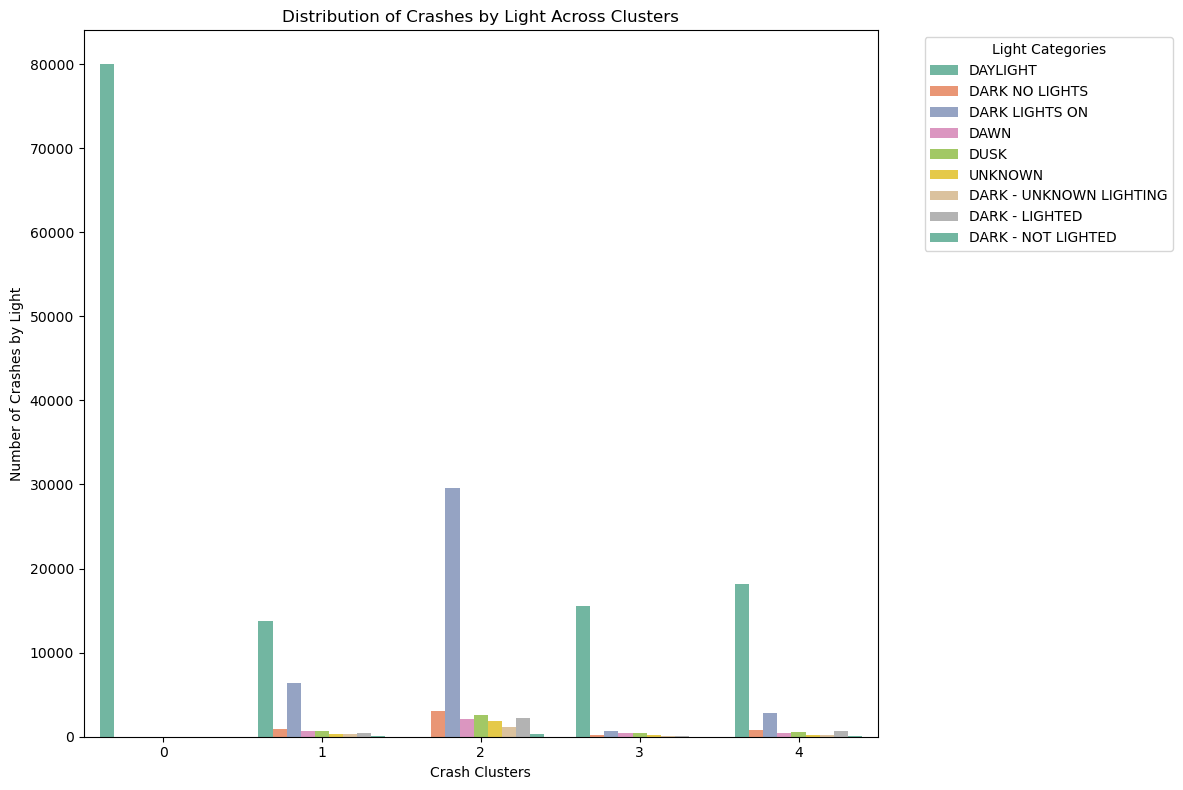

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Crashes by Weather Across Clusters')

Text(0.5, 0, 'Crash Clusters')

Text(0, 0.5, 'Number of Crashes by Weather')

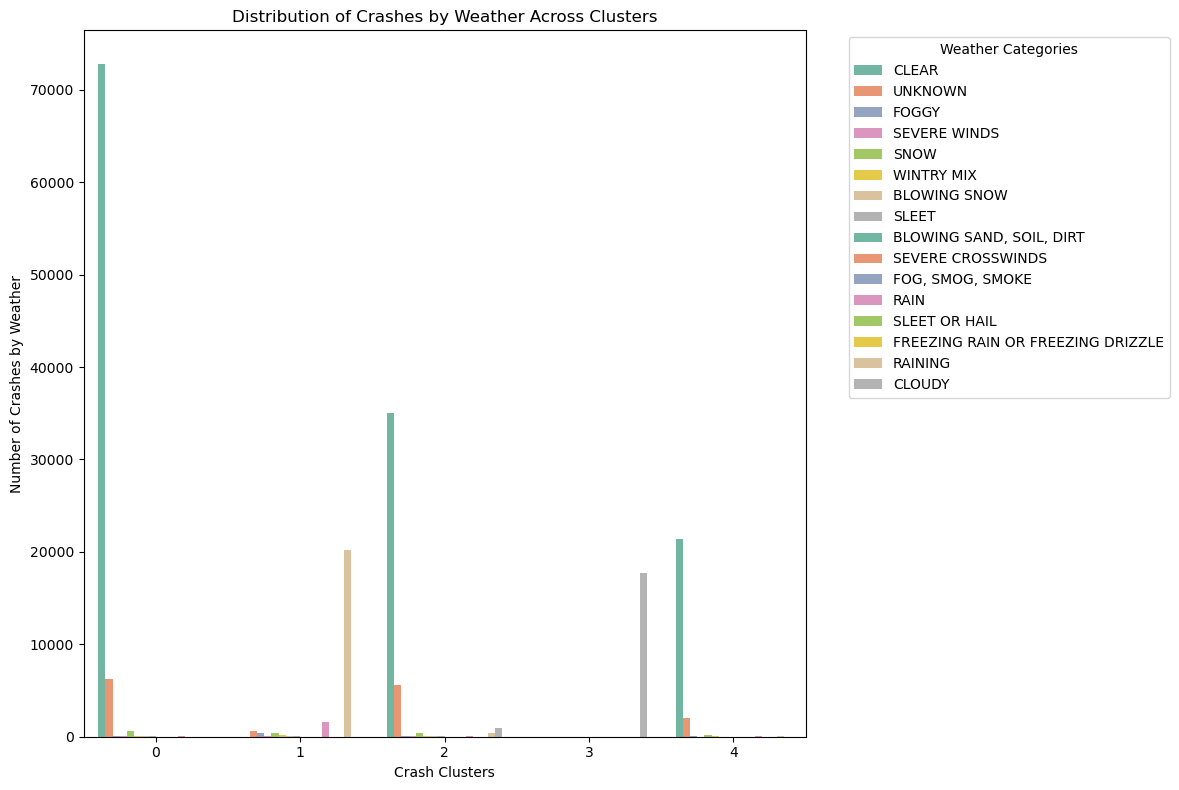

<Figure size 1200x800 with 0 Axes>

<Axes: xlabel='Cluster', ylabel='count'>

Text(0.5, 1.0, 'Distribution of Crashes by Surface Condition Across Clusters')

Text(0.5, 0, 'Crash Clusters')

Text(0, 0.5, 'Number of Crashes by Surface Condition')

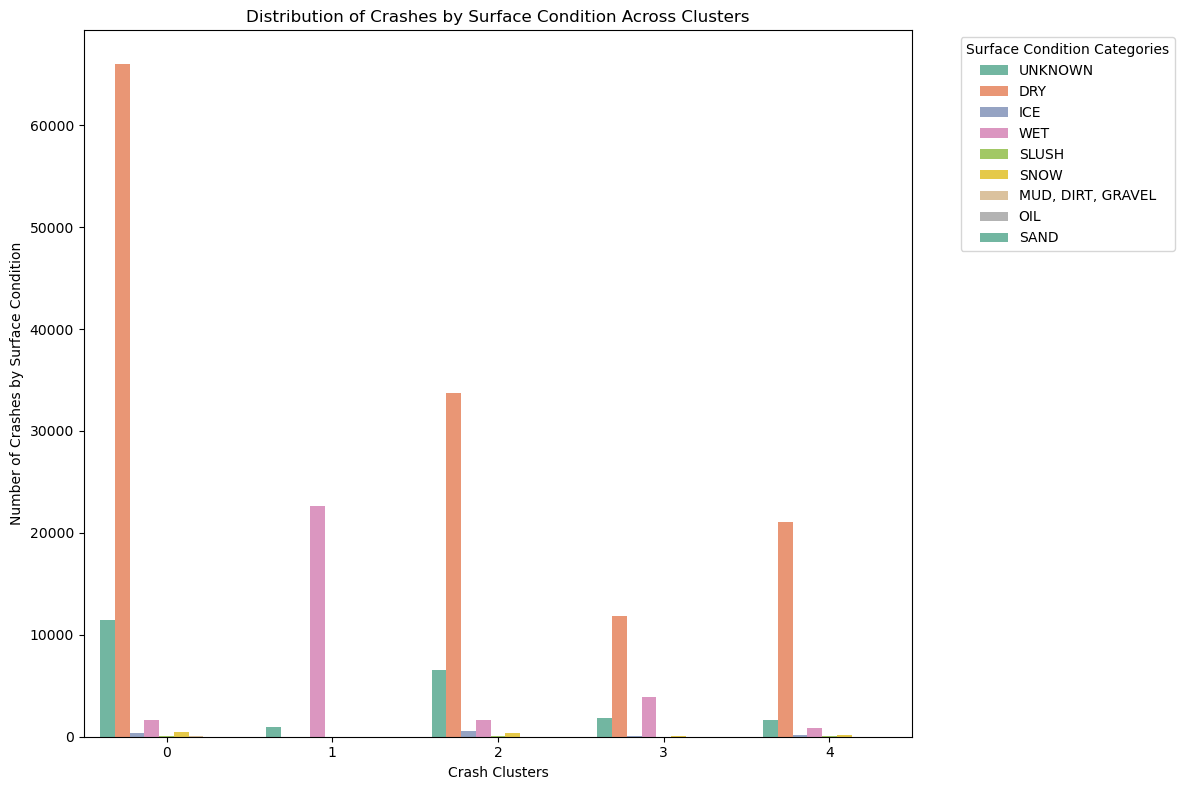

In [37]:
# Categorical features to analyze
categorical_features = ['Light', 'Weather', 'Surface Condition']

# Plot count of categorical features by cluster with more descriptive titles and labels
for feature in categorical_features:
    plt.figure(figsize=(12, 8))
    sns.countplot(data=df_copy, x='Cluster', hue=feature, palette='Set2')
    plt.title(f'Distribution of Crashes by {feature} Across Clusters')
    plt.xlabel('Crash Clusters')
    plt.ylabel(f'Number of Crashes by {feature}')
    plt.legend(title=f'{feature} Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


- **Lighting Condition:** The majority of crashes occurred during daylight, indicating that high visibility does not necessarily prevent accidents.  
- **Weather Condition:** Clear weather conditions accounted for the highest number of crashes, suggesting that optimal weather still poses risks.  
- **Surface Condition:** Dry road surfaces experienced the highest crash rates, emphasizing that good road conditions alone cannot eliminate the likelihood of crashes.  

- Validation

<Figure size 1200x800 with 0 Axes>

([<matplotlib.patches.Wedge at 0x26c4e7c21e0>,
 [Text(-0.7006939132896135, -0.8479552110099259, 'Weather: CLEAR, Surface: DRY, Light: DAYLIGHT'),
  Text(1.074549279302757, -0.2352527286768978, 'Weather: CLEAR, Surface: DRY, Light: DARK LIGHTS ON'),
  Text(0.9742158907581948, 0.5107870380052897, 'Weather: RAINING, Surface: WET, Light: DAYLIGHT'),
  Text(0.6495085751952154, 0.8877717109414341, 'Weather: CLOUDY, Surface: DRY, Light: DAYLIGHT'),
  Text(0.20381284404881264, 1.0809534331324058, 'Weather: CLEAR, Surface: UNKNOWN, Light: DAYLIGHT'),
  Text(-0.1688776058753133, 1.086959223813765, 'Weather: RAINING, Surface: WET, Light: DARK LIGHTS ON'),
  Text(-0.42253043807135626, 1.015612144917157, 'Weather: UNKNOWN, Surface: DRY, Light: DAYLIGHT'),
  Text(-0.5989409453753798, 0.9226428040974722, 'Weather: CLOUDY, Surface: WET, Light: DAYLIGHT'),
  Text(-0.7066050070582208, 0.8430358023241076, 'Weather: CLEAR, Surface: UNKNOWN, Light: DARK LIGHTS ON'),
  Text(-0.8005210356702817, 0.7544309587

Text(0.5, 1.0, 'Top 10 Crash Scenarios with Descriptive Labels')

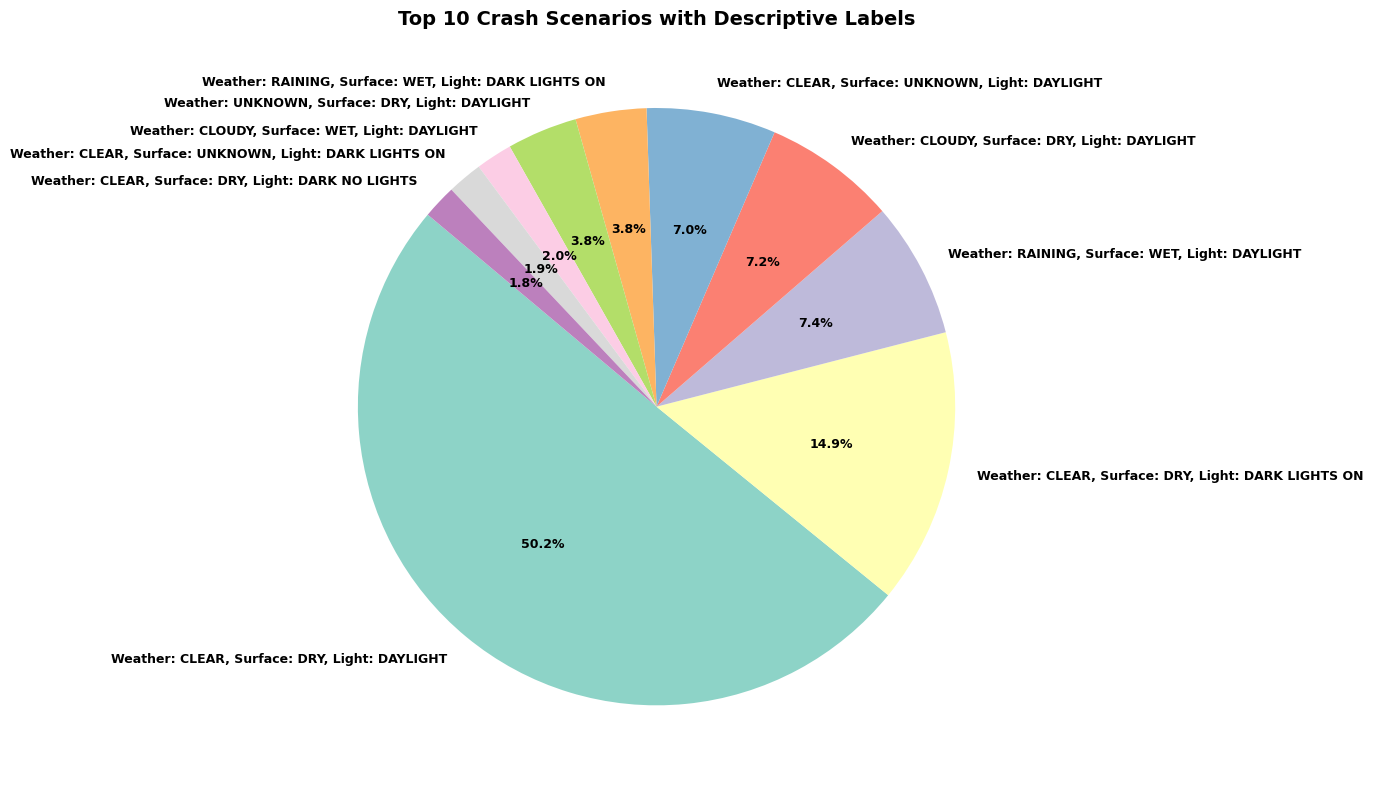

In [38]:
top_conditions = df_copy.groupby([
    'Weather', 
    'Surface Condition', 
    'Light']).size().nlargest(10)
top_conditions_df = top_conditions.reset_index(name='Crash Count')
top_conditions_df['Scenario'] = (
    "Weather: " + top_conditions_df['Weather'] + 
    ", Surface: " + top_conditions_df['Surface Condition'] + 
    ", Light: " + top_conditions_df['Light'] 
)

# Sort data for better readability in the plot
top_conditions_df_sorted = top_conditions_df.sort_values(by="Crash Count", ascending=False)


colors=cm.Set3.colors[:len(top_conditions_df_sorted)]

# Plot the top scenarios with descriptive labels as a pie chart
plt.figure(figsize=(12, 8))
plt.pie(
    top_conditions_df_sorted["Crash Count"], 
    labels=top_conditions_df_sorted["Scenario"], 
    autopct='%1.1f%%', 
    startangle=140, 
    textprops={'fontsize': 9, 'weight': 'bold'},  
    colors=colors,  
  
)
plt.title("Top 10 Crash Scenarios with Descriptive Labels", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

The pie chart validates the clustering analysis by confirming that 50% of crashes occur under clear weather, dry road surfaces, and daylight, consistent with the dominant patterns identified in the clusters.

### Managerial Insight

Use adjustable speed limits that change based on traffic or weather conditions. For example, speed limits could lower automatically if traffic is heavy or visibility is poor.

## Finding 2 : Driver Behaviour Significance 

<b>Crashes peak during constant-speed driving and when vehicles are stopped, with high fault rates in single-vehicle and rear-end collisions exposing the critical impact of reckless driving and lack of awareness on road safety.</b>

In [39]:
# Grouping by key columns and count occurrences, then select the top 15 scenarios

df_copy_filtered = df_copy[(df_copy['Driver Substance Abuse'] != 'UNKNOWN') & (df_copy['Driver Distracted By'] != 'UNKNOWN') & (df_copy['Vehicle Movement'] != 'UNKNOWN')& (df_copy['Driver At Fault'] != 'UNKNOWN')]
top_conditions_2 = df_copy_filtered.groupby([
    'Driver Substance Abuse', 
    'Driver Distracted By', 
    'Vehicle Movement',
    'Driver At Fault'
]).size().nlargest(15)

# Resetting the index for easy handling
top_conditions_df2 = top_conditions_2.reset_index(name='Crash Count')

top_conditions_df2['Scenario'] = (
    "Substance: " + top_conditions_df2['Driver Substance Abuse'] +
    ", Distracted: " + top_conditions_df2['Driver Distracted By'] +
    "\n Movement: " + top_conditions_df2['Vehicle Movement'] 
)




Text(0.5, 1.0, 'Top 15 Crash Scenarios')

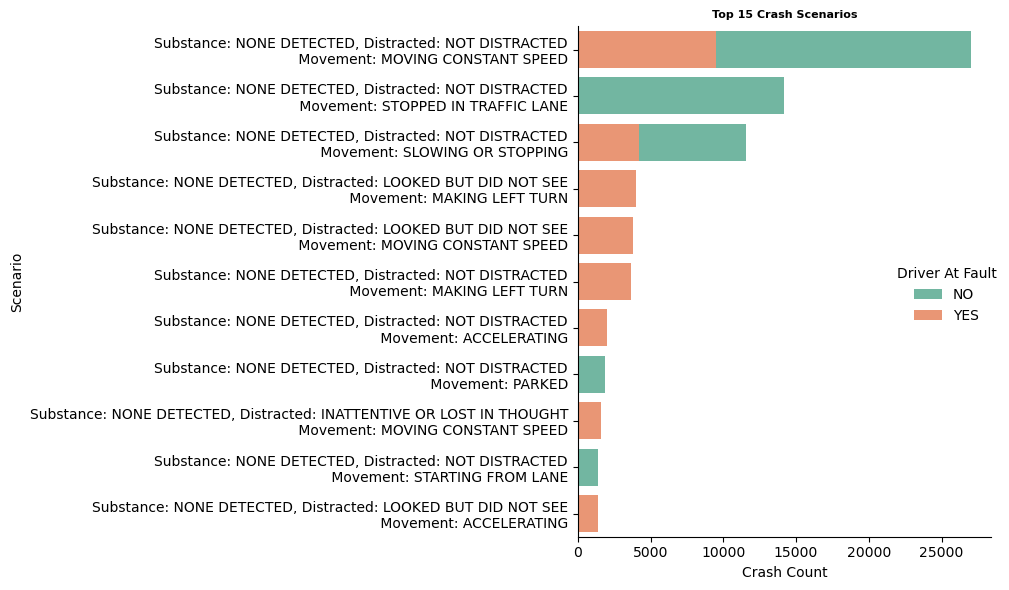

In [40]:
#plotting top 15 scenarios vs crash count
sns.catplot(
    data=top_conditions_df2,
    x='Crash Count',
    y='Scenario',
    hue='Driver At Fault',
    kind='bar',
    palette='Set2',
    height=6,
    aspect=1.5,
    dodge=False
)


plt.title('Top 15 Crash Scenarios', fontsize=8, fontweight='bold')
plt.tight_layout()
plt.show()

Identified the top 15 crash scenarios, revealing that most crashes occur during constant-speed driving or when vehicles are stopped, with many attributed to driver fault, highlighting the importance of attentiveness and responsible driving.

In [41]:
#filtering data by removing 'UNKNOWN'
df_copy_filtered_2 = df_copy[(df_copy['Driver Substance Abuse'] != 'UNKNOWN') & (df_copy['Driver Distracted By'] != 'UNKNOWN') & (df_copy['Vehicle Movement'] != 'UNKNOWN')& (df_copy['Driver At Fault'] != 'UNKNOWN') & (df_copy['Vehicle Movement'] == 'MOVING CONSTANT SPEED') &(df_copy['Driver Substance Abuse'] == 'NONE DETECTED') & (df_copy['Driver Distracted By'] == 'NOT DISTRACTED') &  (df_copy['Collision Type'] != 'UNKNOWN')]

#Group the data by 'Collision Type' and get the top 10 types with the highest occurrence counts.

df_copy_filtered_2.groupby('Collision Type').size().nlargest(10)

Collision Type
STRAIGHT MOVEMENT ANGLE      9263
SAME DIR REAR END            4723
HEAD ON LEFT TURN            4010
SAME DIRECTION SIDESWIPE     3878
SINGLE VEHICLE               3716
ANGLE                        1148
HEAD ON                      1077
SAME DIRECTION LEFT TURN     1011
SAME DIRECTION RIGHT TURN     884
FRONT TO REAR                 731
dtype: int64

<Figure size 1400x800 with 0 Axes>

<Axes: title={'center': 'Driver Fault Trends by Collision Type'}, xlabel='Collision Type'>

Text(0.5, 0, 'Collision Type')

Text(0, 0.5, 'Number of Crashes')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'STRAIGHT MOVEMENT ANGLE'),
  Text(1, 0, 'SAME DIR REAR END'),
  Text(2, 0, 'HEAD ON LEFT TURN'),
  Text(3, 0, 'SAME DIRECTION SIDESWIPE'),
  Text(4, 0, 'SINGLE VEHICLE'),
  Text(5, 0, 'ANGLE'),
  Text(6, 0, 'HEAD ON'),
  Text(7, 0, 'SAME DIRECTION LEFT TURN'),
  Text(8, 0, 'SAME DIRECTION RIGHT TURN'),
  Text(9, 0, 'FRONT TO REAR')])

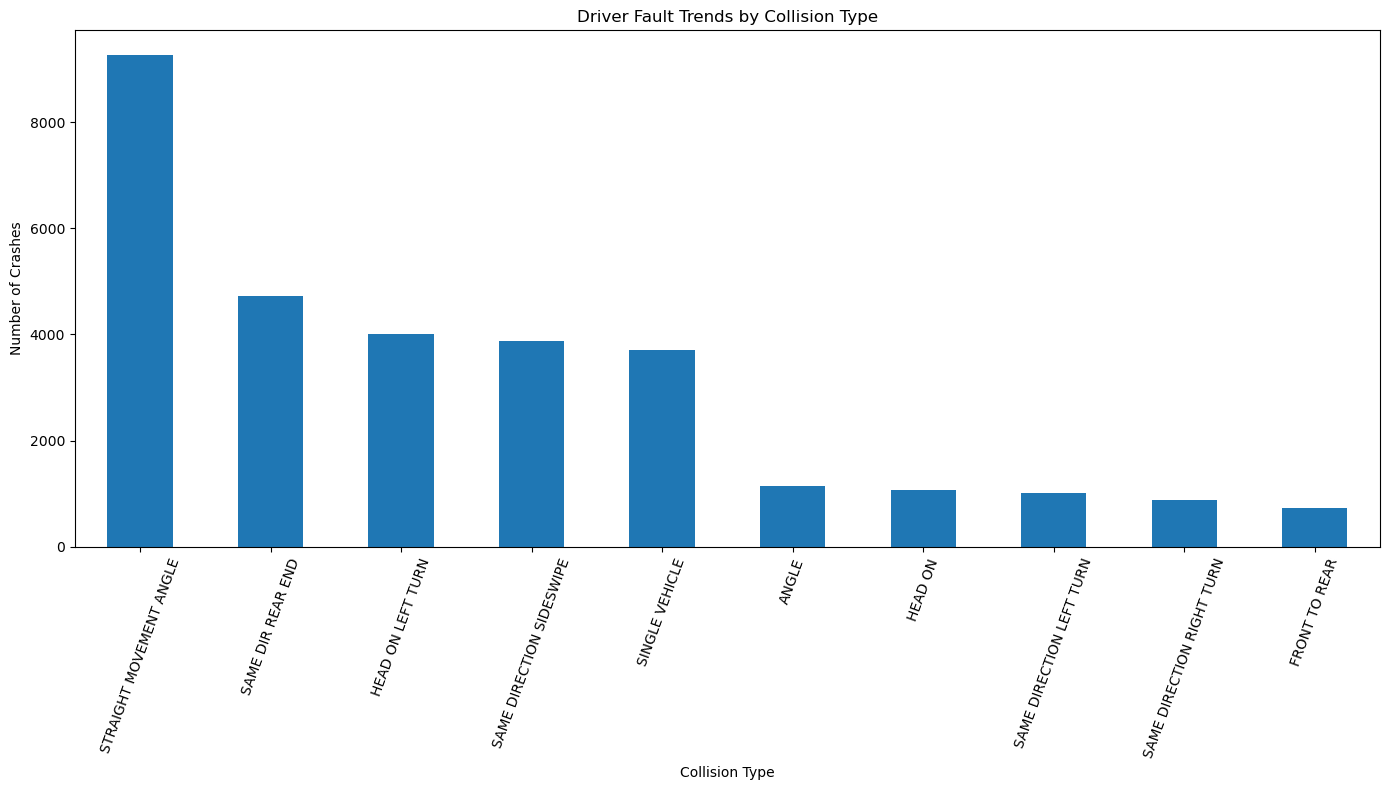

Collision Type
STRAIGHT MOVEMENT ANGLE      9263
SAME DIR REAR END            4723
HEAD ON LEFT TURN            4010
SAME DIRECTION SIDESWIPE     3878
SINGLE VEHICLE               3716
ANGLE                        1148
HEAD ON                      1077
SAME DIRECTION LEFT TURN     1011
SAME DIRECTION RIGHT TURN     884
FRONT TO REAR                 731
dtype: int64

In [42]:
# Analyzing collision types with respect to "Driver At Fault"
collision_fault_analysis = df_copy_filtered_2.groupby(['Collision Type']).size().nlargest(10)

# Visualizing the fault trends for different collision types
plt.figure(figsize=(14, 8))
collision_fault_analysis.plot(kind='bar', stacked=True, figsize=(14, 8), title="Driver Fault Trends by Collision Type")
plt.xlabel("Collision Type")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=70)
plt.tight_layout()
plt.show()

# Displaying the summarized fault trends for detailed insights
collision_fault_analysis

The highest number of crashes occurred in straight movement at an angle, followed by rear-end collisions and left-turn head-on collisions, emphasizing specific driving scenarios prone to driver errors.

<Figure size 1400x800 with 0 Axes>

<Axes: title={'center': 'Top 15 Fault Rates Across Collision Types'}, ylabel='Collision Type'>

Text(0.5, 0, 'Collision Type')

Text(0, 0.5, 'Fault Rate (%)')

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0.0, 0, '0'),
  Text(10.0, 0, '10'),
  Text(20.0, 0, '20'),
  Text(30.0, 0, '30'),
  Text(40.0, 0, '40'),
  Text(50.0, 0, '50'),
  Text(60.0, 0, '60'),
  Text(70.0, 0, '70'),
  Text(80.0, 0, '80')])

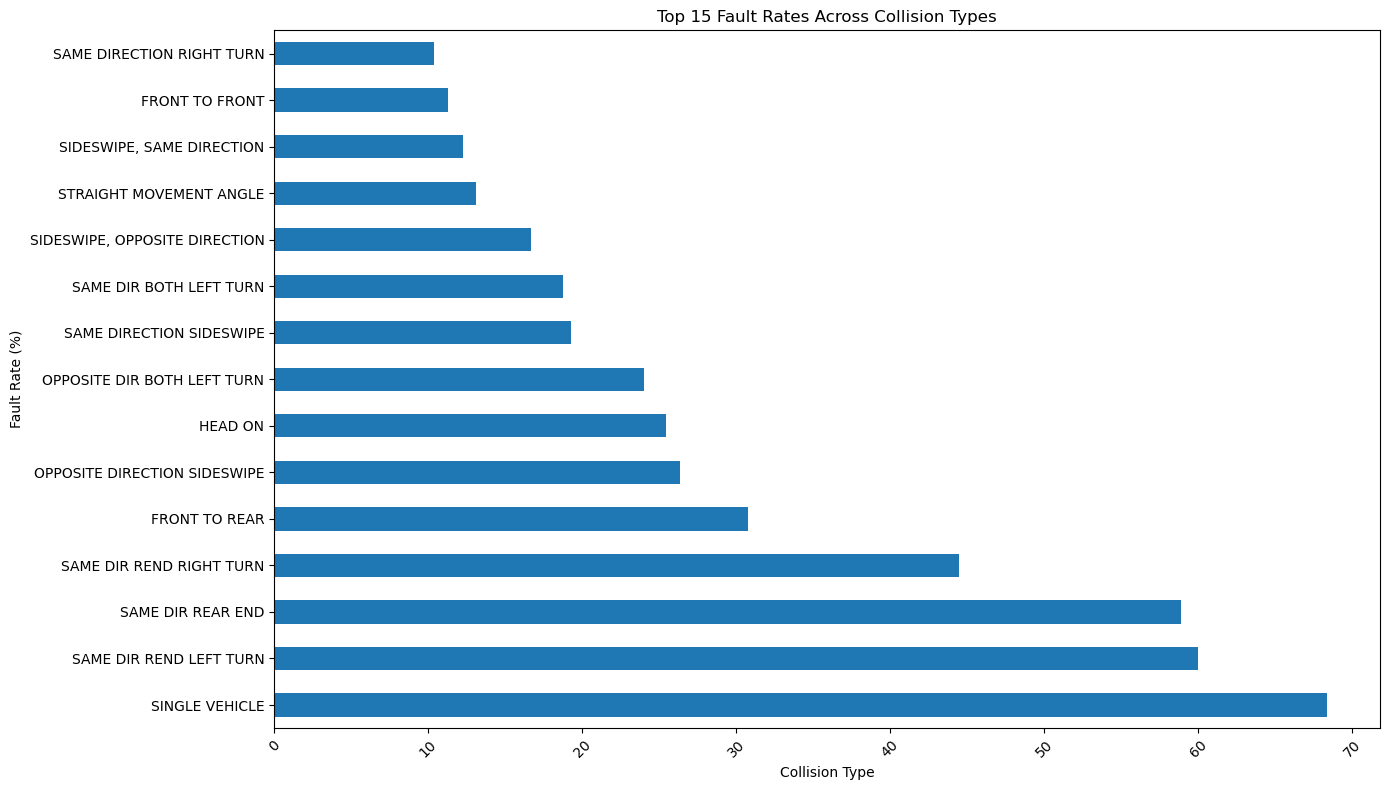

Driver At Fault                  NO   YES  Fault Rate (%)
Collision Type                                           
SINGLE VEHICLE                 1175  2541       68.379978
SAME DIR REND LEFT TURN          34    51       60.000000
SAME DIR REAR END              1941  2782       58.903239
SAME DIR REND RIGHT TURN         40    32       44.444444
FRONT TO REAR                   506   225       30.779754
OPPOSITE DIRECTION SIDESWIPE    495   177       26.339286
HEAD ON                         803   274       25.441040
OPPOSITE DIR BOTH LEFT TURN      38    12       24.000000
SAME DIRECTION SIDESWIPE       3130   748       19.288293
SAME DIR BOTH LEFT TURN          26     6       18.750000
SIDESWIPE, OPPOSITE DIRECTION   155    31       16.666667
STRAIGHT MOVEMENT ANGLE        8050  1213       13.095110
SIDESWIPE, SAME DIRECTION       616    86       12.250712
FRONT TO FRONT                  283    36       11.285266
SAME DIRECTION RIGHT TURN       792    92       10.407240

In [43]:
# Calculating fault rates across collision types
collision_fault_rates = df_copy_filtered_2.groupby(['Collision Type', 'Driver At Fault']).size().unstack()

# Adding a fault rate column
collision_fault_rates['Fault Rate (%)'] = (collision_fault_rates['YES'] / 
                                           (collision_fault_rates['YES'] + collision_fault_rates['NO'])) * 100

# Sorting by fault rate and selecting the top 15 collision types
sorted_fault_rates = collision_fault_rates.sort_values('Fault Rate (%)', ascending=False).head(15)

# Visualizing fault rates for the top 15 collision types
plt.figure(figsize=(14, 8))
sorted_fault_rates['Fault Rate (%)'].plot(kind='barh', title="Top 15 Fault Rates Across Collision Types", figsize=(14, 8))
plt.xlabel("Collision Type")
plt.ylabel("Fault Rate (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Displaying the summarized fault rates for the top 15 collision types
sorted_fault_rates


The top 15 collision types ranked by fault rates highlight single-vehicle crashes with the highest fault rate at nearly 70%.

### Managerial Insight

Encourage the adoption of technologies like lane-keeping assist, adaptive cruise control, and automatic emergency braking by offering tax incentives or subsidies for vehicles equipped with ADAS (Advanced Driver Assistance Systems) features.

## Finding 3 : Traffic Control Effectiveness

<h4>The observation that accidents and severe accidents occur at nearly equal rates regardless of traffic controls suggests that the presence of controls alone is insufficient to mitigate accident risks.</h4>

In [44]:
for i in df_copy['Traffic Control'].unique():
    print(i)

NO CONTROLS
UNKNOWN
STOP SIGN
TRAFFIC SIGNAL
PERSON
FLASHING TRAFFIC SIGNAL
YIELD SIGN
WARNING SIGN
SCHOOL ZONE SIGN DEVICE
RAILWAY CROSSING DEVICE
TRAFFIC CONTROL SIGNAL
FLASHING TRAFFIC CONTROL SIGNAL
OTHER WARNING SIGN
PEDESTRIAN CROSSING
PERSON (INCLUDING FLAGGER, LAW ENFORCEMENT, CROSSING GUARD, ETC.
OTHER SIGNAL
LANE USE CONTROL SIGNAL
OTHER PAVEMENT MARKING (EXCLUDING EDGELINES, CENTERLINES, OR LANE LINES)
PEDESTRIAN CROSSING SIGN
SCHOOL ZONE SIGN
CURVE AHEAD WARNING SIGN
INTERSECTION AHEAD WARNING SIGN
RAMP METER SIGNAL
REDUCE SPEED AHEAD WARNING SIGN
FLASHING RAILROAD CROSSING SIGNAL (MAY INCLUDE GATES)
BICYCLE CROSSING SIGN
SCHOOL ZONE


In [45]:
# Filtering the dataset to exclude 'UNKNOWN' values in 'Traffic Control'.
no_unknown = df[(df_copy['Traffic Control'] != 'UNKNOWN')]

In [46]:
len(no_unknown)

158894

Creating two new columns:
1. Presence of traffic signal
2. Severity of the accident

In [47]:
# Column 1
no_unknown = no_unknown.copy()
no_unknown.loc[:, 'No Controls'] = (no_unknown['Traffic Control'] == 'NO CONTROLS') * 1.0

# 0.0 - Controls present
# 1.0 - No Controls

In [48]:
# Column 2
no_unknown = no_unknown.copy()
no_unknown['Crash Severity'] = no_unknown['Vehicle Damage Extent'].apply(
    lambda x: 1.0 if x in ('DISABLING', 'DESTROYED') else 0.0
)

In [49]:
no_unknown.groupby('No Controls').size()

No Controls
0.0    90266
1.0    68628
dtype: int64

Count of accidents with controls is higher than the count of accidents without controls

In [50]:
controls = no_unknown[(no_unknown['No Controls'] == 0.0)]
controls_sev = controls[(controls['Crash Severity'] == 1)]

no_controls = no_unknown[(no_unknown['No Controls'] == 1.0)]
no_controls_sec = no_controls[(no_controls['Crash Severity'] == 1)]

([<matplotlib.patches.Wedge at 0x26c510667e0>,
 [Text(-1.0215221913501666, -0.4080348178515572, 'Non-Severe'),
  Text(1.0215221913501666, 0.40803481785155754, 'Severe')],
 [Text(-0.5571939225546363, -0.22256444610084936, '62.1%'),
  Text(0.5571939225546363, 0.22256444610084955, '37.9%')])

Text(0.5, 1.0, 'Crash Severity Distribution: Traffic Control')

([<matplotlib.patches.Wedge at 0x26c5108b890>,
 [Text(-1.031969527224347, -0.38083972334875715, 'Non-Severe'),
  Text(1.0319695628811307, 0.3808396267287952, 'Severe')],
 [Text(-0.5628924693950983, -0.20773075819023115, '61.3%'),
  Text(0.5628924888442531, 0.2077307054884337, '38.7%')])

Text(0.5, 1.0, 'Crash Severity Distribution: No Traffic Control')

([<matplotlib.patches.Wedge at 0x26c2d08a270>,
 [Text(-0.9844057410540432, 0.49086183084432244, 'Non-Severe (Traffic Control)'),
  Text(-0.2707031362185134, -1.0661706298906668, 'Severe (Traffic Control)'),
  Text(1.046948341030661, -0.337489512745429, 'Non-Severe (No Traffic Control)'),
  Text(0.5520455540844657, 0.9514440110776752, 'Severe (No Traffic Control)')],
 [Text(-0.536948586029478, 0.26774281682417583, '35.3%'),
  Text(-0.1476562561191891, -0.581547616304, '21.5%'),
  Text(0.5710627314712695, -0.18408518877023397, '26.5%'),
  Text(0.3011157567733449, 0.5189694605878228, '16.7%')])

Text(0.5, 1.0, 'Combined Crash Severity Distribution')

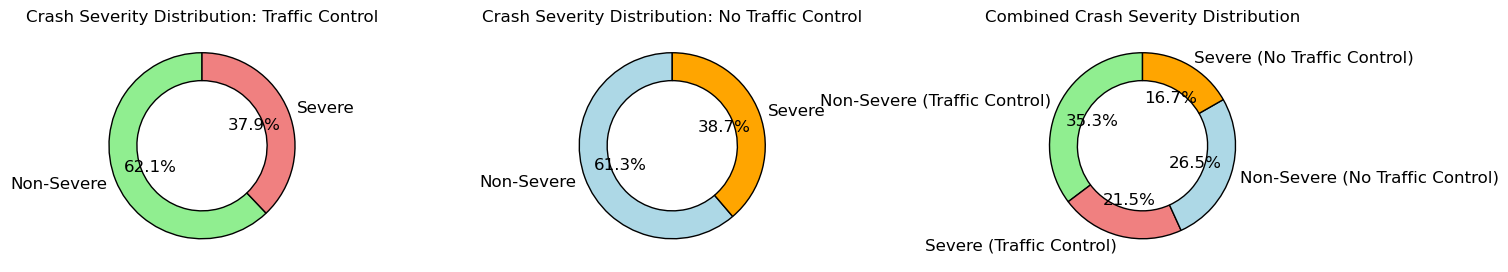

In [51]:
# Calculating the counts for Crash Severity for both Traffic Control and No Traffic Control
controls_severity_counts = controls['Crash Severity'].value_counts()
no_controls_severity_counts = no_controls['Crash Severity'].value_counts()

colors = ['lightgreen', 'lightcoral', 'lightblue', 'orange']

fig, axes = plt.subplots(1, 3, figsize=(15, 7))

# Pie chart for Traffic Control
axes[0].pie(controls_severity_counts, labels=['Non-Severe', 'Severe'], autopct='%1.1f%%', startangle=90,
            colors=colors[:2], wedgeprops={'width': 0.3, 'edgecolor': 'black'}, textprops={'fontsize': 12})
axes[0].set_title('Crash Severity Distribution: Traffic Control')

# Pie chart for No Traffic Control
axes[1].pie(no_controls_severity_counts, labels=['Non-Severe', 'Severe'], autopct='%1.1f%%', startangle=90,
            colors=colors[2:], wedgeprops={'width': 0.3, 'edgecolor': 'black'}, textprops={'fontsize': 12})
axes[1].set_title('Crash Severity Distribution: No Traffic Control')

# Combining the severity counts using pd.concat() 
combined_severity_counts = pd.concat([controls_severity_counts, no_controls_severity_counts], axis=0)

# Plotting the pie chart for combined data (both traffic control and no traffic control)
axes[2].pie(combined_severity_counts, labels=['Non-Severe (Traffic Control)', 'Severe (Traffic Control)', 
                                              'Non-Severe (No Traffic Control)', 'Severe (No Traffic Control)'], 
            autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.3, 'edgecolor': 'black'}, textprops={'fontsize': 12})
axes[2].set_title('Combined Crash Severity Distribution')

# Adjust layout to ensure titles and labels fit
plt.tight_layout()

# Display the plot
plt.show()

In [52]:
len(controls_sev)/len(controls)

0.379035295681652

In [53]:
len(no_controls_sec)/len(no_controls)

0.3874657574167978

In [54]:
no_unknown_fault = no_unknown[no_unknown['Driver At Fault'].str.upper() != 'UNKNOWN']

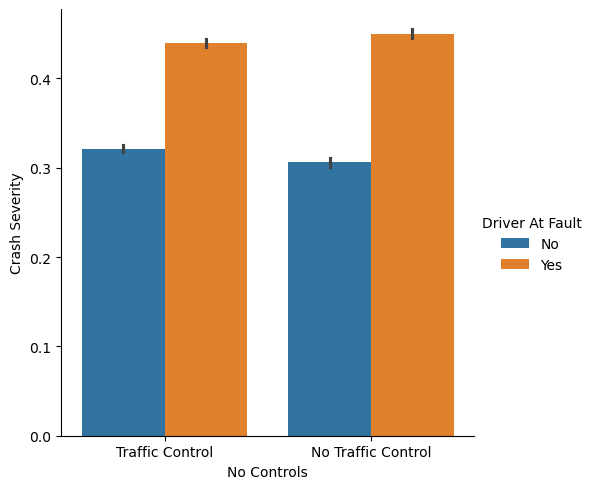

In [55]:
sns.catplot(x='No Controls',y='Crash Severity',hue='Driver At Fault',data=no_unknown_fault,kind='bar')\
.set_xticklabels(['Traffic Control', 'No Traffic Control'])

Crash severity is higher when the driver is at fault, with slightly increased severity in areas without traffic controls.

### Managerial Insight

Expand the use of roundabouts to replace traditional intersections, promoting slower speeds and reducing crash severity. Increase the implementation of pedestrian refuge islands and dedicated bike lanes, building on existing efforts, to better protect walkers and cyclists and minimize conflicts with vehicles.

### Deadend exploration

In [56]:

from sklearn.preprocessing import LabelEncoder
data_deadend =  df_copy.copy()

data_deadend['Crash Year'] = data_deadend['Crash Date/Time'].dt.year
data_deadend['Crash Month'] = df_copy['Crash Date/Time'].dt.month
data_deadend['Crash Hour'] = data_deadend['Crash Date/Time'].dt.hour


categorical_columns = ['Weather', 'Collision Type', 'Surface Condition', 
                       'Light', 'Traffic Control', 'Driver At Fault','Vehicle Damage Extent','Speed Limit']

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df_copy[col] = le.fit_transform(data_deadend[col])
    label_encoders[col] = le


clustering_data = data_deadend[['Injury Severity','Vehicle Damage Extent','Speed Limit']]


kmeans = KMeans(n_clusters=5, random_state=42)
data_deadend['Cluster'] = kmeans.fit_predict(clustering_data)


cluster_summary = data_deadend.groupby('Cluster').agg({
    'Crash Year': 'mean',
    'Crash Month': 'mean',
    'Crash Hour': 'mean',
    'Injury Severity': 'mean'
})

plt.figure(figsize=(10, 6))
plt.scatter(data_deadend['Longitude'], data_deadend['Latitude'], c=data_deadend['Cluster'], cmap='viridis', alpha=0.6)
plt.colorbar(label='Cluster')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Crash Clusters Based on Location')
plt.show()


plt.figure(figsize=(8, 5))
cluster_summary['Injury Severity'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Average Injury Severity')
plt.title('Average Injury Severity by Cluster')
plt.show()


plt.figure(figsize=(8, 5))
cluster_summary['Crash Hour'].plot(kind='bar', color='orange', edgecolor='black')
plt.xlabel('Cluster')
plt.ylabel('Average Crash Hour')
plt.title('Average Crash Hour by Cluster')
plt.show()


ValueError: could not convert string to float: 'NO APPARENT INJURY'

In [ ]:

line_data = data_deadend.groupby(['Crash Month', 'Cluster']).size().reset_index(name='Count')


plt.figure(figsize=(12, 6))
for cluster in line_data['Cluster'].unique():
    cluster_data = line_data[line_data['Cluster'] == cluster]
    plt.plot(cluster_data['Crash Month'], cluster_data['Count'], label=f'Cluster {cluster}')

plt.title("Crash Trends Over Time by Cluster")
plt.xlabel("Crash Month")
plt.ylabel("Number of Crashes")
plt.legend(title="Cluster")
plt.grid()
plt.show()


In [ ]:

heatmap_data = data_deadend.groupby(['Cluster', 'Crash Month']).size().unstack(fill_value=0)


plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=False, fmt="d")
plt.title("Crash Frequency by Hour and Cluster")
plt.xlabel("Crash Month")
plt.ylabel("Cluster")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

high_priced_brands = ['Tesla', 'BMW', 'Mercedes', 'Audi', 'Lexus']
data_deadend['Price Category'] = data_deadend['Vehicle Make'].apply(
    lambda x: 'High-Priced' if str(x) in high_priced_brands else 'Low-Priced'
)


analysis_data = data_deadend[['Price Category', 'Injury Severity', 'Speed Limit']].dropna()


severity_by_price = analysis_data.groupby('Price Category')['Injury Severity'].mean()


high_priced = analysis_data[analysis_data['Price Category'] == 'High-Priced']['Injury Severity']
low_priced = analysis_data[analysis_data['Price Category'] == 'Low-Priced']['Injury Severity']
t_stat, p_value = ttest_ind(high_priced, low_priced, equal_var=False)

plt.figure(figsize=(8, 5))
severity_by_price.plot(kind='bar', color=['gold', 'silver'], edgecolor='black')
plt.title('Average Injury Severity by Vehicle Price Category')
plt.ylabel('Average Injury Severity')
plt.xticks(rotation=0)
plt.show()


print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")


if p_value < 0.05:
    print("Statistical significance: High-priced cars show a significant difference in injury severity.")
else:
    print("No significant difference in injury severity between high-priced and low-priced cars.")

In [ ]:
# Filter rows with 'Fatal Injury' or 'Suspected Serious Injury'
filtered_df = df[
    (df['Injury Severity'] == 'FATAL INJURY') | 
    (df['Injury Severity'] == 'SUSPECTED SERIOUS INJURY')|
    (df['Vehicle Damage Extent'] == 'DISABLING')
]

# Extract the vehicle list
vehicle_list = filtered_df[['Vehicle Make', 'Vehicle Model']]

# Drop duplicates to avoid repetitions
unique_vehicles = vehicle_list.drop_duplicates()

# Display the result
print("Unique vehicles involved in Fatal or Serious Injuries:")
print(unique_vehicles)


In [ ]:
filtered_df['Vehicle Make'].value_counts().head(30).plot(kind='bar', color='skyblue')
plt.title('Top 10 Vehicle Makes Involved in Fatal/Serious Injuries')
plt.xlabel('Vehicle Make')
plt.ylabel('Frequency')
plt.show()

In [ ]:
speed_outliers = data_deadend[(data_deadend['Speed Limit'] > 30) & (data_deadend['Injury Severity'] != 'FATAL INJURY')].head(500)
speed_outliers_1= data_deadend[(data_deadend['Speed Limit'] > 30) & (data_deadend['Injury Severity'] == 'FATAL INJURY')]
df_2 = pd.concat([speed_outliers,speed_outliers_1])

# Count injury severity within these outlier cases
speed_outliers_summary = data_deadend['Injury Severity'].value_counts()

# Visualize injury severity distribution for these speed outliers
plt.figure(figsize=(8, 5))
speed_outliers_summary.plot(kind='bar', color='orange', alpha=0.8)
plt.title("Injury Severity for Unusual Speed Limits", fontsize=15)
plt.xlabel("Injury Severity", fontsize=12)
plt.ylabel("Number of Crashes", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
severity_time = data_deadend.groupby([ 'Crash Hour','Injury Severity']).size().reset_index(name='Crash Count')

# Pivoting for easier visualization
severity_time_pivot = severity_time.pivot(index='Crash Hour', columns='Injury Severity', values='Crash Count').fillna(0)

# Plotting crash severity by time periods
severity_time_pivot.plot(
    kind='line', 
    figsize=(12, 8), 
    marker='o', 
    title='Crash Severity by Time Period'
)
plt.xlabel('Hour of Day')
plt.ylabel('Crash Count')
plt.xticks(range(0, 24), labels=[f'{i}:00' for i in range(0, 24)], rotation=45)
plt.legend(title='Injury Severity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_encoded.drop(['Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Name', 'Light',
       'Traffic Control', 'Driver Substance Abuse',
        'Person ID', 'Driver At Fault',
       'Injury Severity',  
       'Drivers License State', 'Vehicle ID', 'Vehicle Damage Extent',
       'Vehicle First Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Going Dir', 'Speed Limit',
       'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year', 'Vehicle Make',
       'Vehicle Model', 'Latitude', 'Longitude', 'Location', 'Crash Day'], axis=1)

# Thank You!